In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#Sample Data
#[hours_studied]
study_hours = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
test_scores = np.array([50, 55, 70, 80, 85, 90, 92, 98])


In [3]:
#create a decision tree regression model
model = DecisionTreeRegressor(max_depth=3)

#Train the model
model.fit(study_hours, test_scores)


DecisionTreeRegressor(max_depth=3)

In [4]:
#prediction
new_study_hours = np.array([5.5]).reshape(-1,1) # example of hours studied and they are reshape in a 2D array
predicted_score = model.predict(new_study_hours)

# Evaluate the model
predicted_scores = model.predict(study_hours)
mae = mean_absolute_error(test_scores, predicted_scores)
mse = mean_squared_error(test_scores, predicted_scores)
r2 = r2_score(test_scores, predicted_scores)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.25
Mean Squared Error (MSE): 0.25
R-squared (R2) Score: 1.00


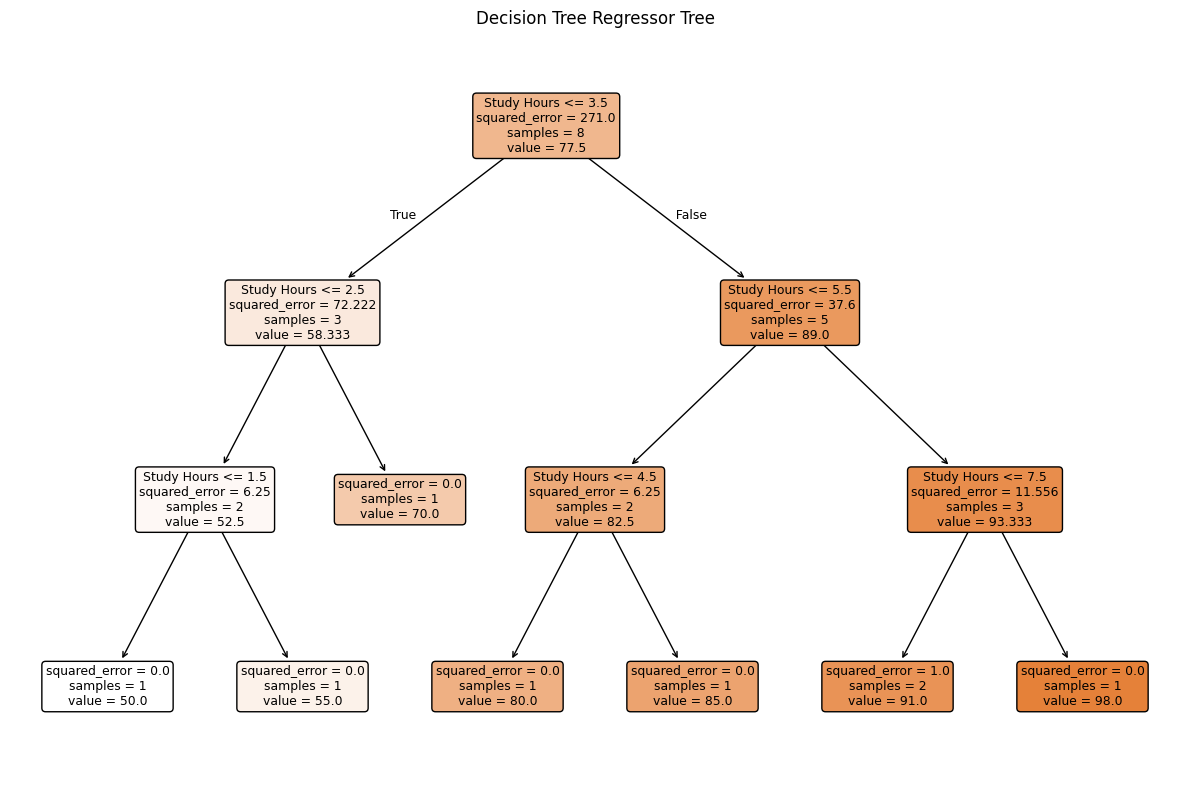

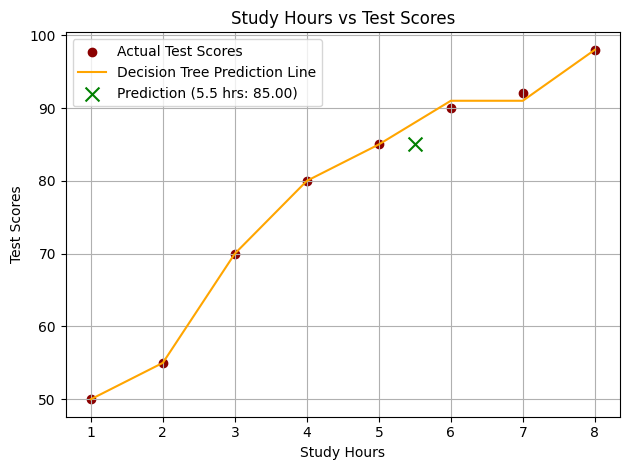

Predicted test score for 5.5 hours of study: 85.00.


In [5]:
output_folder = r"E:\Machine Learning\Models\Decision Tree\output" # use your own here

#plotting the decision tree
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, rounded=True, feature_names=["Study Hours"])
plt.title('Decision Tree Regressor Tree')
plt.tight_layout()
plt.savefig(f"{output_folder}\\decision_tree_regression_tree.png", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

# Plotting Study Hours vs. Test Scores with legends
plt.scatter(study_hours, test_scores, color='darkred', label='Actual Test Scores')
plt.plot(
    np.sort(study_hours, axis=0),
    model.predict(np.sort(study_hours, axis=0)),
    color='orange',
    label='Decision Tree Prediction Line',
)
plt.scatter(
    new_study_hours,
    predicted_score,
    color='green',
    marker='x',
    s=100,
    label=f'Prediction ({new_study_hours[0,0]} hrs: {predicted_score[0]:.2f})'
)
plt.title('Study Hours vs Test Scores')
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(f"{output_folder}\\study_hours_vs_test_scores.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

#Displaying Prediction
print(f"Predicted test score for {new_study_hours[0,0]} hours of study: {predicted_score[0]:.2f}.")
